In [1]:
import pandas as pd

In [7]:
# 서울면적 605.7 제곱킬로
# 대전면적 117 제곱킬로
# 서울시 한 구가 평균적으로 20-30 제곱킬로
# '구'당 대규모 점포수로만 비교했을 때 대전이 서울에 비해 확실히 부족. 최소 1/2-1/3 수준 

In [14]:
rent_seoul = pd.read_csv('/home/subin/다운로드/팩터 논문/서울특별시_전월세가_2022.csv', encoding='cp949')
rent_seoul
# 서울특별시
# '임대료(만원)'이 '0'인 행 : 전세 데이터
# 전세 데이터로 cap rate 구하려면 금리 데이터 필요 -> 복잡해질 것을 우려하여, 월세 데이터에 충분한 양의 아파트 데이터가 있는지 확인

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2022,11560,영등포구,12600,양평동2가,1.0,대지,1.0,3.0,6.0,...,16000,0,힘멜하임,2014.0,오피스텔,22.01~24.01,신규,NaN,0.0,NaN
1,2022,11560,영등포구,11800,도림동,NaN,NaN,NaN,NaN,NaN,...,300,30,NaN,1986.0,단독다가구,NaN,NaN,NaN,NaN,NaN
2,2022,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,19.0,...,10000,135,NaN,2021.0,오피스텔,22.01~24.01,신규,NaN,0.0,0.0
3,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,4000,40,NaN,2019.0,단독다가구,22.02~23.02,신규,NaN,0.0,0.0
4,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,13000,0,NaN,2019.0,단독다가구,22.01~24.01,신규,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560660,2022,11230,동대문구,10200,용두동,NaN,NaN,NaN,NaN,NaN,...,17000,25,NaN,2015.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0
560661,2023,11560,영등포구,13200,신길동,NaN,NaN,NaN,NaN,NaN,...,1000,33,NaN,1990.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0
560662,2023,11530,구로구,10700,개봉동,NaN,NaN,NaN,NaN,NaN,...,8500,0,NaN,1997.0,단독다가구,NaN,NaN,NaN,NaN,NaN
560663,2023,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,5000,60,NaN,1997.0,단독다가구,NaN,NaN,NaN,NaN,NaN


In [82]:
rent_seoul_monthly = rent_seoul[rent_seoul['임대료(만원)']!=0]
rent_seoul_jeonsae = rent_seoul[rent_seoul['임대료(만원)']==0]

In [24]:
rent_seoul_monthly['건물용도'].value_counts()

단독다가구    107067
아파트       93071
연립다세대     46550
오피스텔      33961
Name: 건물용도, dtype: int64

In [27]:
rent_seoul_jeonsae['건물용도'].value_counts()
# 확실히 아파트가 전세 데이터가 많으나 93,071개면 데이터 수 확보는 괜찮은 것으로 판단.
# 아파트 종류, 지역이 다른지 추가 확인 -> 이 정도 분포면 괜찮다고 판단(아래에서 확인)

아파트      126877
연립다세대     74652
단독다가구     50832
오피스텔      27655
Name: 건물용도, dtype: int64

In [29]:
rent_seoul_monthly['자치구명'].value_counts()

송파구     24329
관악구     21551
강남구     18664
강서구     15476
마포구     15245
동작구     14077
광진구     13898
강동구     13458
서초구     13332
영등포구    11590
동대문구    10635
구로구     10553
은평구     10351
성북구      9814
노원구      9667
중랑구      9637
서대문구     8966
성동구      8658
양천구      8026
용산구      7229
금천구      6140
강북구      5676
도봉구      5373
종로구      4198
중구       4106
Name: 자치구명, dtype: int64

In [30]:
rent_seoul_monthly['건물명'].value_counts()

센트레빌레우스1단지       1326
헬리오시티             737
파크리오              619
리센츠               615
용산원효루미니           576
                 ... 
(537-2)             1
(92-33)             1
(252-23)            1
성영빌라트               1
에이치비골드빌(102동)       1
Name: 건물명, Length: 27255, dtype: int64

In [31]:
rent_seoul_jeonsae['건물명'].value_counts()

현대                945
두산                722
신동아               718
우성                572
파크리오              562
                 ... 
뷰리치빌리지              1
천우빌라다동              1
테크노빌                1
진영아트빌(1016-31)      1
수유역투웨니퍼스트           1
Name: 건물명, Length: 34350, dtype: int64

In [83]:
rent_seoul_monthly
# 실거래가 데이터와 '건물명'으로 맵핑할 수 있으므로 결측치를 가지는 경우 삭제
# 건물용도 아파트만 살펴보기

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
1,2022,11560,영등포구,11800,도림동,NaN,NaN,NaN,NaN,NaN,20220101,월세,20.00,300,30,NaN,1986.0,단독다가구,NaN,NaN,NaN,NaN,NaN
2,2022,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,19.0,20220101,월세,27.82,10000,135,NaN,2021.0,오피스텔,22.01~24.01,신규,NaN,0.0,0.0
3,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,20220101,월세,18.50,4000,40,NaN,2019.0,단독다가구,22.02~23.02,신규,NaN,0.0,0.0
5,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,20220101,월세,15.96,12500,6,NaN,2018.0,단독다가구,22.01~24.01,신규,NaN,0.0,0.0
6,2022,11140,중구,16200,신당동,NaN,NaN,NaN,NaN,NaN,20220101,월세,15.00,500,40,NaN,1943.0,단독다가구,22.01~24.01,신규,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560658,2023,11680,강남구,10500,삼성동,NaN,NaN,NaN,NaN,NaN,20221231,월세,57.00,10000,95,NaN,1992.0,단독다가구,22.12~24.12,갱신,NaN,10000.0,63.0
560660,2022,11230,동대문구,10200,용두동,NaN,NaN,NaN,NaN,NaN,20221231,월세,43.00,17000,25,NaN,2015.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0
560661,2023,11560,영등포구,13200,신길동,NaN,NaN,NaN,NaN,NaN,20221231,월세,37.00,1000,33,NaN,1990.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0
560663,2023,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,20221231,월세,63.57,5000,60,NaN,1997.0,단독다가구,NaN,NaN,NaN,NaN,NaN


In [84]:
rent_seoul_monthly = rent_seoul_monthly[rent_seoul_monthly['건물용도']=='아파트']
rent_seoul_monthly

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
74,2022,11440,마포구,10200,공덕동,1.0,대지,43.0,0.0,14.0,20220101,월세,59.97,0,100,공덕2삼성래미안,2004.0,아파트,22.01~23.12,신규,NaN,0.0,0.0
102,2022,11215,광진구,10700,화양동,1.0,대지,113.0,1.0,10.0,20220101,월세,16.53,1000,65,광진코지웰,2014.0,아파트,22.02~24.02,신규,NaN,0.0,0.0
104,2022,11710,송파구,10300,풍납동,1.0,대지,514.0,0.0,27.0,20220101,월세,75.99,65000,34,잠실올림픽공원아이파크,2019.0,아파트,22.01~24.01,갱신,NaN,55000.0,50.0
106,2022,11305,강북구,10200,번동,1.0,대지,242.0,0.0,3.0,20220101,월세,41.30,2000,56,주공1단지,1991.0,아파트,22.01~24.01,신규,NaN,0.0,0.0
118,2022,11215,광진구,10500,자양동,1.0,대지,855.0,0.0,15.0,20220101,월세,84.96,10000,200,이튼타워리버3차,2007.0,아파트,22.01~22.12,신규,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560617,2023,11650,서초구,10800,서초동,1.0,대지,1334.0,1.0,6.0,20221231,월세,144.41,35000,120,신동아아파트(2차),1979.0,아파트,23.02~25.02,갱신,○,40000.0,120.0
560619,2023,11680,강남구,10100,역삼동,1.0,대지,712.0,5.0,6.0,20221231,월세,19.86,2000,150,역삼센트럴2차아이파크,2022.0,아파트,22.12~23.12,신규,NaN,0.0,0.0
560621,2023,11560,영등포구,10900,영등포동8가,1.0,대지,51.0,1.0,16.0,20221231,월세,12.11,500,55,영등포메이준2011,2012.0,아파트,23.01~24.01,신규,NaN,0.0,0.0
560641,2023,11710,송파구,10900,장지동,1.0,대지,854.0,0.0,11.0,20221231,월세,84.94,10000,190,송파파인타운11단지,2007.0,아파트,23.02~25.02,신규,NaN,0.0,0.0


In [38]:
rent_seoul_monthly.isnull().sum()
# 층, 임대료, 건물명 결측치 없음

접수년도           0
자치구코드          0
자치구명           0
법정동코드          0
법정동명           0
지번구분코드         7
지번구분           7
본번             7
부번             7
층              0
계약일            0
전월세구분          0
임대면적           0
보증금(만원)        0
임대료(만원)        0
건물명            0
건축년도          56
건물용도           0
계약기간       30374
신규계약구분     24167
갱신청구권사용    82893
종전보증금      24167
종전임대료      24167
dtype: int64

In [142]:
# 실거래가 데이터

actualPrice = pd.read_csv('/home/subin/다운로드/여피/0315 업무/trade_history_2018-2023_edit.csv', header=None)
actualPrice.columns = ['old_addr_idx', '거래날짜', '거래가격', '임대면적', '층', '알수없음_1', '거래방식', '알수없음_2', '알수없음_3', '시군구', '번지', '읍면동', '건물명', '세대수', '건축연도', '건물종류']
actualPrice['임대면적'] = actualPrice['임대면적'].round(2)
actualPrice

<ipython-input-142-8658ebf5266c>:1: DtypeWarning: Columns (5,6,8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  actualPrice = pd.read_csv('/home/subin/다운로드/여피/0315 업무/trade_history_2018-2023_edit.csv', header=None)


,old_addr_idx,거래날짜,거래가격,임대면적,층,알수없음_1,거래방식,알수없음_2,알수없음_3,시군구,번지,읍면동,건물명,세대수,건축연도,건물종류
0,3023010200_00034_00000_apartment,2020-02-28,99000000,59.04,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3023010200_00027_00007_apartment,2020-02-03,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3023010200_00027_00007_apartment,2020-03-22,66000000,56.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3023010200_00027_00007_apartment,2020-04-29,77000000,56.26,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3023010200_00027_00007_apartment,2020-05-25,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206971,NaN,2022-08-20,209000000,19.13,11,NaN,중개거래,NaN,NaN,서울 송파구,41-1,방이동,잠실파크웨이,11710.0,2019.0,officetel
2206972,NaN,2022-08-24,139000000,19.53,4,NaN,중개거래,NaN,NaN,서울 송파구,38-4,방이동,벨리시모 오피스텔,11710.0,2013.0,officetel
2206973,NaN,2022-08-27,190000000,15.98,7,NaN,중개거래,NaN,NaN,서울 송파구,49-11,방이동,한 스위트 올림픽파크,11710.0,2020.0,officetel
2206974,NaN,2022-08-31,410000000,29.18,17,NaN,중개거래,NaN,NaN,서울 송파구,46-2,방이동,사보이시티잠실,11710.0,2021.0,officetel


In [128]:
# 주소 데이터 보완을 위해 공시지가 데이터 활용
# 현재 작업 중

officialPrice = pd.read_csv('/home/subin/다운로드/여피/0308 업무-20230310T030110Z-001/0308 업무/complex_20230308 (사본).csv', header=None)
officialPrice.columns = ['old_addr_idx', 'complex_name', 'property_type','시도', '시군구',
               '읍면동','리','road_name','road_code','admin_dong_code','postal_code','jibun_main','jibun_sub','updated']
officialPrice

,old_addr_idx,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated
0,1111010100_00001_00000_apartment,청운벽산빌리지,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,1,0,2021-01-01
1,1111010100_00003_00000_apartment,인텔빌라B C동,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,3,0,2021-01-01
2,1111010100_00003_00150_apartment,인텔빌라A동,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,3,150,2021-01-01
3,1111010100_00004_00001_apartment,아델하우스,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,1,2021-01-01
4,1111010100_00004_00003_apartment,GRACETUSCANII,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,3,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320920,5013032022_00048_00003_apartment,표선제이파크빌,apartment,제주특별자치도,서귀포시,표선면,하천리,일주동로5661번길,501304850717,5013032000,63627,48,3,2021-01-01
320921,5013032022_02167_00000_apartment,지오화이트빌리지,apartment,제주특별자치도,서귀포시,표선면,하천리,한마음초등로,501303350311,5013032000,63627,2167,0,2021-01-01
320922,5013032023_02008_00000_apartment,보네르펜션,apartment,제주특별자치도,서귀포시,표선면,성읍리,번영로,501303349234,5013032000,63624,2008,0,2022-06-01
320923,5013032024_02521_00005_apartment,(2521-5),apartment,제주특별자치도,서귀포시,표선면,가시리,중산간동로,501303349238,5013032000,63623,2521,5,2021-01-01


In [113]:
actualPriceApt = actualPrice[actualPrice['건물종류']!='officetel']
actualPriceApt = actualPriceApt.dropna(subset=['건물명'])
actualPriceApt
# 전국 실거래가 데이터 포함되어있으나, '건물명'으로 맵핑하므로 굳이 시군구 데이터 처리하지 않음('경남 창녕군, 대구 달성군'과 같은 데이터 존재)
# 전월세 데이터, 실거래가 데이터에서 층수까지 일치하는 경우는 별로 없을 것으로 판단, 건물명 하나의 평균 임대료, 평균 실거래가 계산 후 맵핑하기로
# 실거래가, 월세 데이터 모두 2022년 것만 사용

,old_addr_idx,거래날짜,거래가격,임대면적,층,알수없음_1,거래방식,알수없음_2,알수없음_3,시군구,번지,읍면동,건물명,세대수,건축연도,건물종류
2184937,1111017500_00202_00003_apartment,2022-10-05,134000000,17.81,14,11110-2339,중개거래,NaN,NaN,서울 종로구,202-3,숭인동,종로중흥S클래스,11110.0,2013.0,apartment
2184938,1111017500_00318_00002_apartment,2022-10-10,123500000,15.09,17,11110-2368,중개거래,NaN,NaN,서울 종로구,318-2,숭인동,삼전솔하임4차,11110.0,2014.0,apartment
2184939,1111017500_00296_00019_apartment,2022-10-13,135000000,16.67,5,11110-2322,중개거래,NaN,NaN,서울 종로구,296-19,숭인동,삼전솔하임2차,11110.0,2012.0,apartment
2184940,1114015400_00145_00001_apartment,2022-10-19,200000000,14.54,9,11140-1355,중개거래,NaN,NaN,서울 중구,145-1,오장동,오렌지카운티을지로,11140.0,2020.0,apartment
2184941,1114016200_00432_01666_apartment,2022-10-14,3250000000,201.85,1,11140-1062,중개거래,NaN,NaN,서울 용산구,432-1666,신당동,남산FORESTHOUSE,11140.0,2008.0,apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203363,5011010400_01034_00001_apartment,2022-09-16,280000000,83.94,5,50110-3027,중개거래,NaN,NaN,제주 제주시,1034-1,이도이동,이도월드하우스,50110.0,2009.0,apartment
2203364,5011010400_00777_00000_apartment,2022-09-27,580000000,39.69,4,50110-46,중개거래,NaN,NaN,제주 제주시,777,이도이동,주공3,50110.0,1989.0,apartment
2203365,5013010400_02161_00000_apartment,2022-09-01,317000000,84.82,2,50130-958,중개거래,NaN,NaN,제주 서귀포시,2161,호근동,호근동코아루오션뷰,50130.0,2017.0,apartment
2203366,5013010500_00147_00000_apartment,2022-09-01,214000000,39.69,1,50130-28,중개거래,NaN,NaN,제주 서귀포시,147,동홍동,주공1,50130.0,1988.0,apartment


In [114]:
# 주소 데이터 정리하기
# 정리 과정 삭제


In [73]:
actualPriceApt['거래날짜'].str.split('-').str[0].value_counts()
# 모두 2022년만 있음.

2022    4679
Name: 거래날짜, dtype: int64

In [99]:
actualPriceApt_avg = actualPriceApt.groupby(['건물명', '층']).mean().reset_index()
actualPriceApt_avg = actualPriceApt_avg.groupby('건물명').mean().reset_index()
actualPriceApt_avg

<ipython-input-99-a9b070128f21>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  actualPriceApt_avg = actualPriceApt.groupby(['건물명', '층']).mean().reset_index()


,건물명,층,거래가격,임대면적,알수없음_2,세대수,건축연도
0,(160-16),2.0,1.130000e+08,22.72,NaN,11290.0,2017.0
1,(20-3),4.0,8.000000e+07,12.42,NaN,11215.0,2015.0
2,(457-19),9.0,1.260000e+08,43.95,NaN,41500.0,2014.0
3,(473-6),7.0,1.785000e+08,82.24,NaN,47750.0,2018.0
4,(54-25),-1.0,4.900000e+07,31.24,NaN,26110.0,1999.0
...,...,...,...,...,...,...,...
4120,힐스테이트태전2차에듀포레C10BL,23.0,5.000000e+08,72.94,NaN,41610.0,2019.0
4121,힐스테이트태전6(1609~1614동),20.0,4.890000e+08,72.89,NaN,41610.0,2017.0
4122,힐스테이트태전6지구(1601동~1608동),21.0,4.500000e+08,72.86,NaN,41610.0,2017.0
4123,힐스프라임,10.0,2.570000e+08,76.37,NaN,44710.0,2021.0


In [100]:
actualPriceApt_avg_map = actualPriceApt_avg[['건물명', '거래가격']]

In [85]:
rent_seoul_monthly = rent_seoul_monthly[rent_seoul_monthly['접수년도']==2022]
rent_seoul_monthly

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
74,2022,11440,마포구,10200,공덕동,1.0,대지,43.0,0.0,14.0,20220101,월세,59.97,0,100,공덕2삼성래미안,2004.0,아파트,22.01~23.12,신규,NaN,0.0,0.0
102,2022,11215,광진구,10700,화양동,1.0,대지,113.0,1.0,10.0,20220101,월세,16.53,1000,65,광진코지웰,2014.0,아파트,22.02~24.02,신규,NaN,0.0,0.0
104,2022,11710,송파구,10300,풍납동,1.0,대지,514.0,0.0,27.0,20220101,월세,75.99,65000,34,잠실올림픽공원아이파크,2019.0,아파트,22.01~24.01,갱신,NaN,55000.0,50.0
106,2022,11305,강북구,10200,번동,1.0,대지,242.0,0.0,3.0,20220101,월세,41.30,2000,56,주공1단지,1991.0,아파트,22.01~24.01,신규,NaN,0.0,0.0
118,2022,11215,광진구,10500,자양동,1.0,대지,855.0,0.0,15.0,20220101,월세,84.96,10000,200,이튼타워리버3차,2007.0,아파트,22.01~22.12,신규,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560432,2022,11380,은평구,10700,응암동,1.0,대지,769.0,0.0,5.0,20221231,월세,39.95,13322,35,녹번역e편한세상캐슬,2021.0,아파트,NaN,신규,NaN,0.0,0.0
560434,2022,11350,노원구,10500,상계동,1.0,대지,691.0,0.0,9.0,20221231,월세,41.30,1000,65,상계주공7(고층),1988.0,아파트,23.01~24.01,갱신,NaN,1000.0,55.0
560448,2022,11650,서초구,10300,우면동,1.0,대지,737.0,0.0,12.0,20221231,월세,59.99,10000,190,서초네이처힐6단지,2013.0,아파트,23.03~25.03,신규,NaN,0.0,0.0
560471,2022,11710,송파구,10700,가락동,1.0,대지,913.0,0.0,3.0,20221231,월세,49.29,20000,200,헬리오시티,2018.0,아파트,23.01~25.01,신규,NaN,0.0,0.0


In [89]:
pd.set_option('display.max_rows', 10)
rent_seoul_monthly_avg = rent_seoul_monthly.groupby(['건물명', '층']).mean().reset_index()
rent_seoul_monthly_avg = rent_seoul_monthly_avg.groupby('건물명').mean().reset_index()
rent_seoul_monthly_avg
# 월세 데이터는 저층부가 많고, 실거래가 데이터는 고층부가 많다면 단순 평균이 정확한 cap rate 계산을 못하나, 우선 가장 간단한 작업만 진행.
# 보증금으로 추가 수익 낼 수도 있으나 무시

<ipython-input-89-718b08a39601>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rent_seoul_monthly_avg = rent_seoul_monthly.groupby(['건물명', '층']).mean().reset_index()


,건물명,층,접수년도,자치구코드,법정동코드,지번구분코드,본번,부번,계약일,임대면적,보증금(만원),임대료(만원),건축년도,종전보증금,종전임대료
0,(1-10),5.0,2022.0,11200.0,10700.0,1.0,1.0,10.0,20220663.00,75.7000,2000.0,110.000000,2003.0,0.0,0.0
1,(1-102),2.0,2022.0,11110.0,17300.0,1.0,1.0,102.0,20221213.00,59.9700,250.0,27.500000,1997.0,NaN,NaN
2,(1101-1),7.5,2022.0,11560.0,13300.0,1.0,1101.0,1.0,20220184.50,14.5650,875.0,51.875000,2012.0,0.0,0.0
3,(143-37),4.0,2022.0,11500.0,10300.0,1.0,143.0,37.0,20220717.00,18.0200,2000.0,48.500000,2011.0,0.0,0.0
4,(1546-0),7.0,2022.0,11140.0,16500.0,1.0,1546.0,0.0,20220302.00,29.3500,1000.0,95.000000,2015.0,1000.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,힐타워,3.0,2022.0,11680.0,10800.0,1.0,53.0,1.0,20220210.00,129.6300,7000.0,66.666667,2001.0,0.0,0.0
4891,힐탑트레져1동,2.5,2022.0,11170.0,13100.0,1.0,1.0,44.0,20220743.75,213.5275,109500.0,625.000000,2003.0,NaN,NaN
4892,힐튼빌리지1차,1.0,2022.0,11170.0,10100.0,1.0,244.0,91.0,20221004.00,82.3500,2000.0,115.000000,2002.0,2000.0,110.0
4893,힐하우스,3.0,2022.0,11170.0,13200.0,1.0,1.0,30.0,20221127.00,241.7800,2340.0,819.000000,2001.0,2340.0,780.0


In [92]:
rent_seoul_monthly_avg_map = rent_seoul_monthly_avg[['건물명', '임대료(만원)']]

In [101]:
map_avg = pd.merge(actualPriceApt_avg_map, rent_seoul_monthly_avg_map, how="inner", on='건물명')
map_avg

,건물명,거래가격,임대료(만원)
0,(20-3),8.000000e+07,10.000000
1,(792-86),2.300000e+08,37.000000
2,(794-17),2.380000e+08,55.000000
3,3RU-City,2.600000e+08,69.260417
4,CJ나인파크,1.340000e+09,192.468750
...,...,...,...
890,힐스테이트,3.525000e+08,268.046296
891,힐스테이트 상도 센트럴파크,1.250000e+09,117.997817
892,힐스테이트 상도 프레스티지,1.530000e+09,127.051111
893,힐스테이트녹번,9.450000e+08,77.750088


In [103]:
map_avg['CapRate'] = map_avg['임대료(만원)']*12*10000 / map_avg['거래가격'] * 100
map_avg

,건물명,거래가격,임대료(만원),CapRate
0,(20-3),8.000000e+07,10.000000,1.500000
1,(792-86),2.300000e+08,37.000000,1.930435
2,(794-17),2.380000e+08,55.000000,2.773109
3,3RU-City,2.600000e+08,69.260417,3.196635
4,CJ나인파크,1.340000e+09,192.468750,1.723601
...,...,...,...,...
890,힐스테이트,3.525000e+08,268.046296,9.124980
891,힐스테이트 상도 센트럴파크,1.250000e+09,117.997817,1.132779
892,힐스테이트 상도 프레스티지,1.530000e+09,127.051111,0.996479
893,힐스테이트녹번,9.450000e+08,77.750088,0.987303


<Axes: >

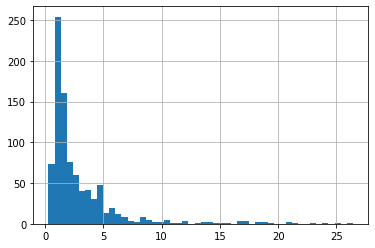

In [106]:
map_avg['CapRate'].hist(bins=50)
# cap rate 10% 이상은 잘못 계산된 것으로 판단

In [110]:
map_avg.describe()

,거래가격,임대료(만원),CapRate
count,8.950000e+02,895.000000,895.000000
mean,7.783330e+08,99.422093,2.921059
std,7.480502e+08,78.356939,3.406451
min,3.900000e+07,9.600000,0.279070
25%,2.500000e+08,61.051839,1.111750
50%,5.950000e+08,83.856061,1.663000
75%,1.050000e+09,111.100000,3.469333
max,9.450000e+09,1266.666667,26.400000


In [40]:
month2 = pd.read_csv('/home/subin/다운로드/팩터 논문/아파트전월세자료현황.csv', encoding='cp949')
month2
# 광명시

,기준년도,기준월,기준일,건축년도,법정동명,번지,아파트명,층수,보증금액(만원),월세금액(만원),전용면적(㎡)
0,2022,1,1,1986,철산동,449,주공12,1,49000,0,83.010
1,2022,1,1,1986,철산동,449,주공12,1,49000,0,83.010
2,2022,1,3,2005,광명동,779,현진에버빌,15,20000,30,59.807
3,2022,1,3,1997,광명동,200-6,광명한진타운,11,57000,0,84.950
4,2022,1,3,1997,광명동,200-6,광명한진타운,11,57000,0,84.950
...,...,...,...,...,...,...,...,...,...,...,...
40677,2015,9,31,2009,소하동,1294,광명소하휴먼시아5단지,6,40000,0,84.830
40678,2015,9,31,2011,소하동,1389,광명역세권휴먼시아5단지,7,42000,0,101.100
40679,2015,9,31,2006,소하동,1273,금호어울림,6,25000,40,84.990
40680,2015,9,31,2009,소하동,1292,광명소하휴먼시아4단지(임대),10,3427,24,46.900


In [ ]:
# 공시지가랑 실거래가 맵핑해서 주소 데이터 붙이기
# 주소, 층수, 건물명으로 전월세 데이터 붙이기